In [21]:
import cv2
import matplotlib.pyplot as plt

import time

%matplotlib inline

In [4]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [5]:
seinfeld = cv2.imread('Bilder/Seinfeld.jpg')
gray_jerry = cv2.cvtColor(seinfeld, cv2.COLOR_BGR2GRAY)

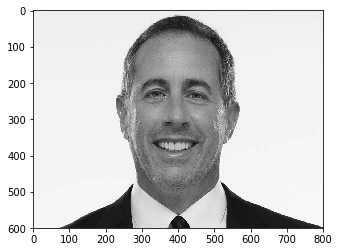

In [6]:
plt.imshow(gray_jerry, cmap='gray')

In [7]:
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')
lbp_face_cascade = cv2.CascadeClassifier('data/lbpcascade_frontalface.xml')

In [8]:
faces = haar_face_cascade.detectMultiScale(gray_jerry, scaleFactor=1.1, minNeighbors = 5);
print('Faces found: ', len(faces))

Faces found:  1


In [9]:
for (x,y,w,h) in faces:
    cv2.rectangle(seinfeld, (x,y), (x+w,y+h), (0,255,0), 2)

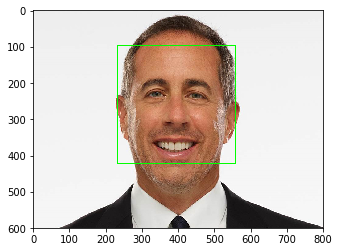

In [10]:
plt.imshow(convertToRGB(seinfeld))

In [17]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
 #just making a copy of image passed, so that passed image is not changed 
    img_copy = colored_img.copy()          
 
 #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          
 
 #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);          
 
 #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)              
 
    return img_copy

In [22]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Operations on the frame
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Display resultingframe (siehe oben)
    cv2.imshow('frame', gray)
    if(cv2.waitKey(1) & 0xFF == ord('q')):
        break
        

# Am Ende alles wieder schliessen und vor allem das capturing entlassen
cap.release()
cv2.destroyAllWindows()


error: C:\ci\opencv_1512688052760\work\modules\imgproc\src\color.cpp:11048: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor
